In [2]:
# Imports
import torch
import torch.nn as nn
import torch.nn.functional as F

import numpy as np
import matplotlib.pyplot as plt

import matplotlib_inline.backend_inline as backend_inline

backend_inline.set_matplotlib_formats("svg")


#### Pytorch device specific configuration ###
# # Pytorch Gpu Configuration for Cuda
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Pytorch Gpu Configuration for directml(AMD GPU)
# import torch_directml

# device = torch_directml.device()

# Set default device
torch.set_default_device(device)

In [ ]:
### Create a conv2D class instance with parameters
# Parameters
in_channels = 3  # RGB channels
out_channels = 16  # Number of filters
kernel_size = 5  # Size of the filter
stride = 1  # Stride of the filter
padding = 0  # Padding of the filter

# Create a Conv2D layer
c = nn.Conv2d(in_channels, out_channels, kernel_size, stride, padding)

# Let's see what the Conv2D layer looks like
print(c)
print(" ")

# Check weight and biases
print("Weight shape: ", c.weight.shape)
print("Bias shape: ", c.bias.shape)

Conv2d(3, 16, kernel_size=(5, 5), stride=(1, 1))
 
Weight shape:  torch.Size([16, 3, 5, 5])
Bias shape:  torch.Size([16])


torch.Size([1, 3, 64, 64])
(64, 64, 3, 1)


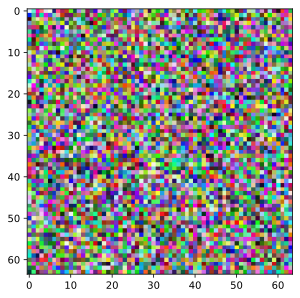

In [4]:
#### Convolve with an image
# size of the image (N, RGB, height, width)
imsize = (1, 3, 64, 64)

img = torch.rand(imsize)

# pytorch wants channels first, but matplotlib wants channels last.
# therefore, tensors must be permuted to visualize
img2view = img.permute(2, 3, 1, 0).numpy()
print(img.shape)
print(img2view.shape)

plt.imshow(np.squeeze(img2view))

In [5]:
# convolve the image with the filter bank (set of 'outChans' kernels)
convRes = c(img)

print(img.shape)
print(convRes.shape)

torch.Size([1, 3, 64, 64])
torch.Size([1, 16, 60, 60])


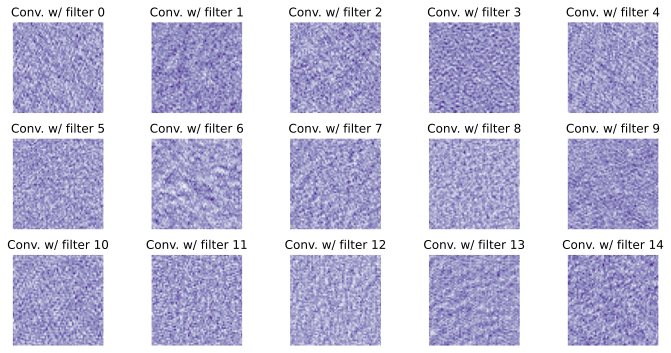

In [6]:
# What do the convolved images look like? (Hint: think of the bathtub picture.)

fig, axs = plt.subplots(3, 5, figsize=(10, 5))

for i, ax in enumerate(axs.flatten()):

    # extract this "layer" of the convolution result
    I = torch.squeeze(convRes[0, i, :, :]).detach()

    # and visualize it
    ax.imshow(I, cmap="Purples")
    ax.set_title("Conv. w/ filter %s" % i)
    ax.axis("off")

plt.tight_layout()
plt.show()